## Methane B (From the paper)
なんとなく$\alpha$-Mnの結晶構造が不審なので、Maynard-CaselyのMethane Bの炭素位置を再構築してみる。



In [2]:
import numpy as np
import re

_carbons = """C1 0.000 0.000 0.000 0.089(4) 
C2 0.0926(6) 0.0926(6) 0.2784(8) 0.089(4) 
C3 0.3231(9) 0.3231(9) 0.3231(9) 0.089(4) 
C4 0.1425(8) 0.1425(8) 0.5371(13) 0.089(4)
""".splitlines()

atomd = dict()
for line in _carbons:
    cols = line.split()
    row = []
    for x in cols[1:4]:
        m = re.search(f"^([0-9.]+)", x)
        row.append(float(m.group(1)))
    atomd[cols[0]] = row

atomd

{'C1': [0.0, 0.0, 0.0],
 'C2': [0.0926, 0.0926, 0.2784],
 'C3': [0.3231, 0.3231, 0.3231],
 'C4': [0.1425, 0.1425, 0.5371]}

In [3]:
from genice2.cell import cellvectors
from genice2 import CIF

a = 11.850 / 10.0  # nm
A = 90

# cellvectors関数は単位胞の幾何形状情報を行列にする。
cell = cellvectors(a, a, a, A, A, A)
cell

array([[1.185, 0.   , 0.   ],
       [0.   , 1.185, 0.   ],
       [0.   , 0.   , 1.185]])

In [4]:
# Methane B space group I -4 3 m の対称操作
# http://img.chem.ucl.ac.uk/sgp/large/217az1.htm
symops = """      x,            y,            z
      x,           -y,           -z
     -x,            y,           -z
     -x,           -y,            z
      z,            x,            y
     -z,           -x,            y
      z,           -x,           -y
     -z,            x,           -y
      y,            z,            x
     -y,            z,           -x
     -y,           -z,            x
      y,           -z,           -x
     -x,            z,           -y
     -x,           -z,            y
      x,            z,            y
      x,           -z,           -y
     -z,           -y,            x
      z,           -y,           -x
      z,            y,            x
     -z,            y,           -x
      y,           -x,           -z
     -y,            x,           -z
      y,            x,            z
     -y,           -x,            z
""".replace(",", "")

symops2=[]
for line in symops.splitlines():
    cols = line.split()
    cols = [col + "+1/2" for col in cols]
    symops2.append(" ".join(cols))

symops += "\n".join(symops2)

# 対称操作表に従い、原子位置を複製する。すべての原子位置がこれで求められる。
atoms = CIF.fullatoms(atomd, sops=CIF.symmetry_operators(symops))
atoms

[('C1', array([0., 0., 0.])),
 ('C2', array([0.0926, 0.0926, 0.2784])),
 ('C3', array([0.3231, 0.3231, 0.3231])),
 ('C4', array([0.1425, 0.1425, 0.5371])),
 ('C2', array([ 0.0926, -0.0926, -0.2784])),
 ('C3', array([ 0.3231, -0.3231, -0.3231])),
 ('C4', array([ 0.1425, -0.1425, -0.5371])),
 ('C2', array([-0.0926,  0.0926, -0.2784])),
 ('C3', array([-0.3231,  0.3231, -0.3231])),
 ('C4', array([-0.1425,  0.1425, -0.5371])),
 ('C2', array([-0.0926, -0.0926,  0.2784])),
 ('C3', array([-0.3231, -0.3231,  0.3231])),
 ('C4', array([-0.1425, -0.1425,  0.5371])),
 ('C2', array([0.2784, 0.0926, 0.0926])),
 ('C4', array([0.5371, 0.1425, 0.1425])),
 ('C2', array([-0.2784, -0.0926,  0.0926])),
 ('C4', array([-0.5371, -0.1425,  0.1425])),
 ('C2', array([ 0.2784, -0.0926, -0.0926])),
 ('C4', array([ 0.5371, -0.1425, -0.1425])),
 ('C2', array([-0.2784,  0.0926, -0.0926])),
 ('C4', array([-0.5371,  0.1425, -0.1425])),
 ('C2', array([0.0926, 0.2784, 0.0926])),
 ('C4', array([0.1425, 0.5371, 0.1425])),
 

In [5]:
len(atoms)

58

In [6]:
# 扱いにくいので、炭素の座標だけを抽出する。
carbons = np.array([atom[1] for atom in atoms if atom[0][0] == "C"])
carbons -= np.floor(carbons+0.5)

carbons

array([[ 0.    ,  0.    ,  0.    ],
       [ 0.0926,  0.0926,  0.2784],
       [ 0.3231,  0.3231,  0.3231],
       [ 0.1425,  0.1425, -0.4629],
       [ 0.0926, -0.0926, -0.2784],
       [ 0.3231, -0.3231, -0.3231],
       [ 0.1425, -0.1425,  0.4629],
       [-0.0926,  0.0926, -0.2784],
       [-0.3231,  0.3231, -0.3231],
       [-0.1425,  0.1425,  0.4629],
       [-0.0926, -0.0926,  0.2784],
       [-0.3231, -0.3231,  0.3231],
       [-0.1425, -0.1425, -0.4629],
       [ 0.2784,  0.0926,  0.0926],
       [-0.4629,  0.1425,  0.1425],
       [-0.2784, -0.0926,  0.0926],
       [ 0.4629, -0.1425,  0.1425],
       [ 0.2784, -0.0926, -0.0926],
       [-0.4629, -0.1425, -0.1425],
       [-0.2784,  0.0926, -0.0926],
       [ 0.4629,  0.1425, -0.1425],
       [ 0.0926,  0.2784,  0.0926],
       [ 0.1425, -0.4629,  0.1425],
       [-0.0926,  0.2784, -0.0926],
       [-0.1425, -0.4629, -0.1425],
       [-0.0926, -0.2784,  0.0926],
       [-0.1425,  0.4629,  0.1425],
       [ 0.0926, -0.2784, -0

In [7]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=carbons[:, 0],
        y=carbons[:, 1],
        z=carbons[:, 2],
        # x=vecs[zpos<0.5, 0],
        # y=vecs[zpos<0.5, 1],
        # z=vecs[zpos<0.5, 2],
        mode="markers",
        # marker=dict(size=2, color=zpos[:]),
    )
)

fig.update_layout(
    title="local arrangement",
    autosize=True,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
)

fig.show()

Text(0, 0.5, 'Frequency of the pair distance')

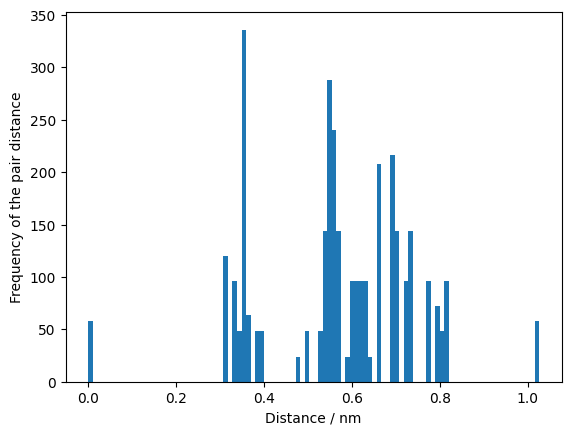

In [8]:
import matplotlib.pyplot as plt
distances = []
for i, ci in enumerate(carbons):
    vectors = []
    for cj in carbons:
        d = ci - cj
        # PBC
        d -= np.floor(d + 0.5)
        # fractional to absolute
        d = d @ cell
        distances.append(np.linalg.norm(d))

H = plt.hist(distances, bins=100)
plt.xlabel("Distance / nm")
plt.ylabel("Frequency of the pair distance")

## Methane B BOO

In [9]:

import boo

neighbors = dict()

numAtoms = carbons.shape[0]

boos = np.zeros([carbons.shape[0], 5])
rc = 0.41

for i, ci in enumerate(carbons):
    vectors = []
    for cj in carbons:
        d = ci - cj
        # PBC
        d -= np.floor(d + 0.5)
        # fractional to absolute
        d = d @ cell
        if 0 < d @ d < 0.41**2:
            vectors.append(d)

    print(len(vectors))
    vectors = np.array(vectors)
    for k, l in enumerate([4, 6, 8, 10, 12]):
        X = vectors[:, 0]
        Y = vectors[:, 1]
        Z = vectors[:, 2]
        booo = boo.boo(l, X, Y, Z)
        print(f"boo Q_{l} {booo}")
        boos[i, k] = booo


16
boo Q_4 (0.0028719399414405843+0j)
boo Q_6 (0.19220027656878974+0j)
boo Q_8 (0.25609008886417+0j)
boo Q_10 (0.03704116570347713+0j)
boo Q_12 (0.37986712818782864+0j)
12
boo Q_4 (0.06682102946644639+0j)
boo Q_6 (0.6086819032679872+0j)
boo Q_8 (0.13335447885373578+0j)
boo Q_10 (0.29766531244729477+0j)
boo Q_12 (0.44422714761391674+0j)
16
boo Q_4 (0.01629325783793193+0j)
boo Q_6 (0.2095980904727884+0j)
boo Q_8 (0.27056918445385597+0j)
boo Q_10 (0.022222865339861286+0j)
boo Q_12 (0.33499194633549856+0j)
13
boo Q_4 (0.0653792874822811+0j)
boo Q_6 (0.447942039881213+0j)
boo Q_8 (0.11804307404194476+0j)
boo Q_10 (0.22568581101398028+0j)
boo Q_12 (0.3336226723229747+0j)
12
boo Q_4 (0.06682102946644633+0j)
boo Q_6 (0.6086819032679872+0j)
boo Q_8 (0.13335447885373564+0j)
boo Q_10 (0.29766531244729466+0j)
boo Q_12 (0.44422714761391674+0j)
16
boo Q_4 (0.01629325783793199+0j)
boo Q_6 (0.20959809047278843+0j)
boo Q_8 (0.270569184453856+0j)
boo Q_10 (0.022222865339861345+0j)
boo Q_12 (0.3349919463

/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_47895/1907903161.py:29: ComplexWarning:

Casting complex values to real discards the imaginary part



In [10]:
# 扱いやすいように、見出しをつけてpandasデータフレームにする。
import pandas as pd

df_MeB = pd.DataFrame(boos, columns=["q_4", "q_6", "q_8", "q_10", "q_12"])
df_MeB

,q_4,q_6,q_8,q_10,q_12
0,0.002872,0.192200,0.256090,0.037041,0.379867
1,0.066821,0.608682,0.133354,0.297665,0.444227
2,0.016293,0.209598,0.270569,0.022223,0.334992
3,0.065379,0.447942,0.118043,0.225686,0.333623
4,0.066821,0.608682,0.133354,0.297665,0.444227
5,0.016293,0.209598,0.270569,0.022223,0.334992
6,0.065379,0.447942,0.118043,0.225686,0.333623
7,0.066821,0.608682,0.133354,0.297665,0.444227
8,0.016293,0.209598,0.270569,0.022223,0.334992
9,0.065379,0.447942,0.118043,0.225686,0.333623


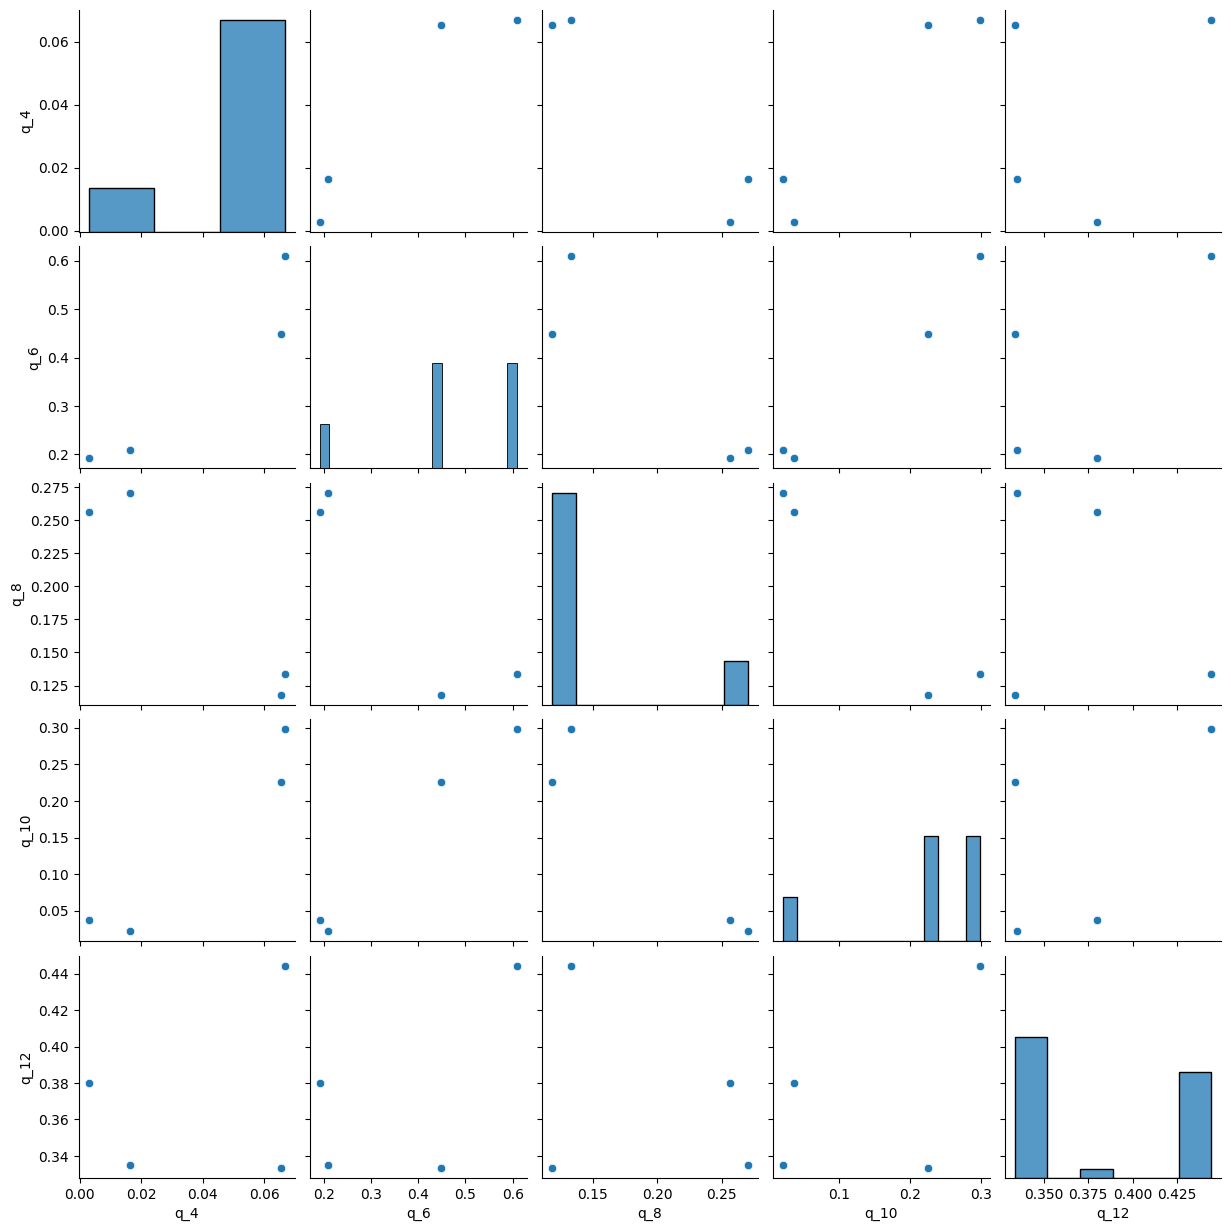

In [11]:
import seaborn as sns

sns.pairplot(df_MeB, diag_kws=dict(bins=100, binwidth=0.02))

Methane Bのgroファイルを作ってみよう。

In [16]:
import gromacs

CH = 0.1087  # nm

replicate = np.array([2,2,2])
rep_carbons = []
# 座標を3倍に増やす。もとがfractional座標なので、0〜3の範囲になる。
for x in range(replicate[0]):
    for y in range(replicate[0]):
        for z in range(replicate[0]):
            rep_carbons.append(carbons + np.array([x,y,z]))
# 座標を0〜1におさめる
rep_carbons = np.vstack(rep_carbons) / replicate
# セルを大きくする。
# 行ごとに係数をかけたい。
# 多少なりとも読みやすく
rep_cell = np.vstack([cell[0,:] * replicate[0],
                      cell[1,:] * replicate[1],
                      cell[2,:] * replicate[2]])
print(rep_cell)

abs_carbons = rep_carbons @ rep_cell

hydrogens = (
    np.array([[-1, -1, -1], [-1, +1, +1], [+1, -1, +1], [+1, +1, -1]]) / 3**0.5 * CH
)

residues = dict()
residues["MET"] = [
    [
        ["C", pos],
        ["H", pos + hydrogens[0]],
        ["H", pos + hydrogens[1]],
        ["H", pos + hydrogens[2]],
        ["H", pos + hydrogens[3]],
    ]
    for pos in abs_carbons
]

frame = gromacs.compose(residues, rep_cell)
with open("MeB.gro", "w") as f:
    gromacs.write_gro(frame, f)

[[2.37 0.   0.  ]
 [0.   2.37 0.  ]
 [0.   0.   2.37]]
